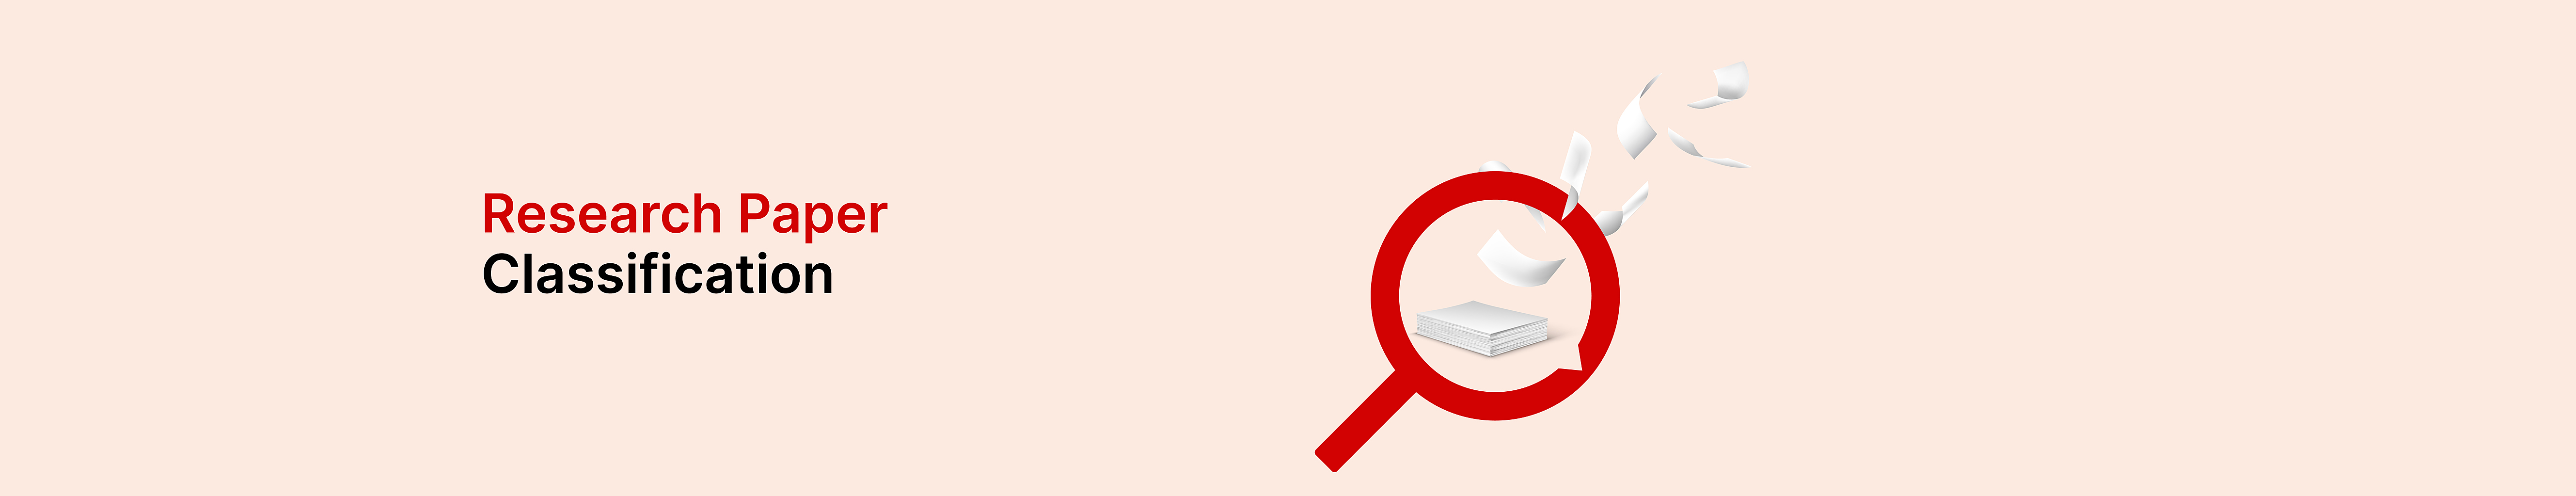

<h2><center>Starter Code for Research paper Classification</center></h2>

<!-- <h6><center>Author : Shubhamai</center></h6> -->



<!-- --- -->

Ok, we learned the fundamentals from Natural Language Processing in our [First Challenge](https://www.aicrowd.com/challenges/ai-blitz-9/problems/emotion-detection) and we did Classification of different emotions. Now here the task is still the same - Classification. But the main point of this challange isn't the task itself, but is how we complete the task. There are many cons with the word2vec, which we are trying solve here.   

### What we are going to Learn

  - What is LSTM & why LSTM ? 
  - Using Tensorflow to create the dataset, converting texts into tokens and encoding them using Vectorization.  
  - Creating & Training a Tenforflow models with LSTM layers.  
  - Testing and Submitting the Results to the Challenge. 

# Setup AIcrowd Utilities 🛠

Here we are installing AIcrowd CLI to download the the challange dataset

In [ ]:
!pip install -q -U aicrowd-cli

     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 81kB 8.3MB/s 
     |████████████████████████████████| 204kB 21.2MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 174kB 21.5MB/s 
     |████████████████████████████████| 61kB 9.3MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


### Downloading Dataset

So first, as in the previous challenge, we will first need to download the python library by AIcrowd that will allow us to download the dataset by just inputting the API key. 

In [ ]:
API_KEY = '61d7dd898be9a4343531783c2ca4a402' # Please get your your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
# Downloading the Dataset ( removing data and assets folder if existing already and then creating the folder )
!rm -rf data
!mkdir data
!rm -rf assets
!mkdir assets

!aicrowd dataset download --challenge research-paper-classification -j 3 -o data # Downloading the dataset and saving it in data folder

val.csv:   0% 0.00/883k [00:00<?, ?B/s]
test.csv:   0% 0.00/3.01M [00:00<?, ?B/s]

val.csv: 100% 883k/883k [00:00<00:00, 1.14MB/s]

test.csv: 100% 3.01M/3.01M [00:01<00:00, 2.90MB/s]


train.csv: 100% 8.77M/8.77M [00:01<00:00, 4.71MB/s]


# Define preprocessing code 💻

As you probably have guessed, we will be using [Tensorflow](https://www.tensorflow.org/) maily for creating the dataset and training the **LSTM** model. 

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score
import os

# Tensorflow
import tensorflow as tf
tf.random.set_seed(42) # Addign seed to reproducability


# To make things more beautiful! 
from rich.console import Console
from rich.table import Table
from rich import pretty
pretty.install()


# function to display YouTube videos
from IPython.display import YouTubeVideo

### Reading Dataset

Reading the necessary files to train, validation & submit our results! 

In [ ]:
train_df = pd.read_csv("data/train.csv")
val_df = pd.read_csv("data/val.csv")
train_df

id 
 text 
 label 
 
 
 
 
 0 
 0 
 we propose deep network models and learning al... 
 3 
 
 
 1 
 1 
 multi-distance information computed by the MDL... 
 3 
 
 
 2 
 2 
 traditional solutions consider dense pedestria... 
 2 
 
 
 3 
 3 
 in this paper, is used the lagrangian classica... 
 2 
 
 
 4 
 4 
 the aim of this work is to determine how vulne... 
 3 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 31495 
 31495 
 the proposed method is easily programmed by ki... 
 2 
 
 
 31496 
 31496 
 research in unpaired video translation has foc... 
 3 
 
 
 31497 
 31497 
 deep learning models exhibit limited generaliz... 
 3 
 
 
 31498 
 31498 
 in this paper, we aim to incorporate global se... 
 3 
 
 
 31499 
 31499 
 to precisely calculate context-based probabili... 
 3 
 
 
 
 31500 rows × 3 columns

<matplotlib.axes._subplots.AxesSubplot object at 0x7efdc64ca610>

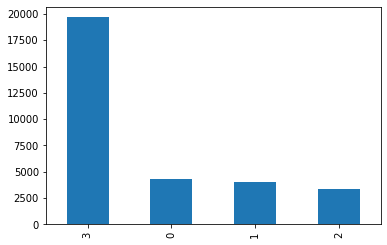

In [ ]:
train_df['label'].value_counts().plot(kind='bar')

Ok, we are seeing that there is quite a big dataset imbalance problem here. But, I will leave this to you to fix it. You know, the starter code will not contain solutions to everything 😉 . 

# Creating the Dataset 📁

From here, we will be using Tensorflow extensily to create the dataset and in the next section, training and our model and submitting resuts. 

One hot encoding is a technique which helps to convert your categorical column ( in this case, the label column ) to a numerial column which we can input into the model. There are many other techniques to do this, one hot encode is very popular and a good technique among them. In simple here's what one hot encoding does --

In [ ]:
train_one_hot_label = pd.get_dummies(train_df['label'])
val_one_hot_label = pd.get_dummies(val_df['label'])

train_one_hot_label[:10]

0 
 1 
 2 
 3 
 
 
 
 
 0 
 0 
 0 
 0 
 1 
 
 
 1 
 0 
 0 
 0 
 1 
 
 
 2 
 0 
 0 
 1 
 0 
 
 
 3 
 0 
 0 
 1 
 0 
 
 
 4 
 0 
 0 
 0 
 1 
 
 
 5 
 0 
 0 
 0 
 1 
 
 
 6 
 0 
 1 
 0 
 0 
 
 
 7 
 0 
 0 
 1 
 0 
 
 
 8 
 0 
 0 
 0 
 1 
 
 
 9 
 0 
 0 
 0 
 1

In [ ]:
train_df.head(10)

id 
 text 
 label 
 
 
 
 
 0 
 0 
 we propose deep network models and learning al... 
 3 
 
 
 1 
 1 
 multi-distance information computed by the MDL... 
 3 
 
 
 2 
 2 
 traditional solutions consider dense pedestria... 
 2 
 
 
 3 
 3 
 in this paper, is used the lagrangian classica... 
 2 
 
 
 4 
 4 
 the aim of this work is to determine how vulne... 
 3 
 
 
 5 
 5 
 classification is one of the most well studied... 
 3 
 
 
 6 
 6 
 denoising autoencoders (DAE) are trained to re... 
 1 
 
 
 7 
 7 
 we present a novel haptic teleoperation approa... 
 2 
 
 
 8 
 8 
 deep convolutional neural networks (CNN) have ... 
 3 
 
 
 9 
 9 
 the focus of this work is sign spotting - give... 
 3

Can you detect the pattern ? 

The `from_tensor_slices` helps to convert the dataset from numpy array to a Tensorflow Dataset which we can them use a tons of other functions to create batches and inputting our dataset into the model

In [ ]:
X_train, y_train = train_df['text'].values.astype(str), np.asarray(train_one_hot_label.values).astype(np.float32)

X_val, y_val = val_df['text'].values.astype(str), np.asarray(val_one_hot_label.values).astype(np.float32)

In [ ]:
# Inputting the X ( features ) and y ( labels )
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

train_dataset

<TensorSliceDataset shapes: ((), (4,)), types: (tf.string, tf.float32)>

In [ ]:
# Setting up batch size
BATCH_SIZE = 64

train_dataset = train_dataset.batch(BATCH_SIZE)
validation_dataset = validation_dataset.batch(BATCH_SIZE)

train_dataset

<BatchDataset shapes: ((None,), (None, 4)), types: (tf.string, tf.float32)>

In [ ]:
# Reading sample text and labels from the dataset

for example, label in train_dataset.take(1):
  print('Text : ', example.numpy()[0])
  print('Label : ', label.numpy()[0])

Text :  b'we propose deep network models and learning algorithms for learning binary hash codes given image representations under both unsupervised and supervised manners . the novelty of our network design is that we constrain one hidden layer to directly output the binary codes . resulting optimizations involving these binary, independence, and balance constraints are difficult to solve .'
Label :  [0. 0. 0. 1.]


There will be a lot going in the upcoming cells let's debrief here - 

1. The `TextVectorization` basically helps us to convert your texts into vectors ( as you can probably guessed by the function name )

  There are several steps inside the `TextVectorization` function - 

  1. Doing little bit of preprocessing/clearning the text. 
  2. Converting all of the sentences into words ( tokens )
  3. Assigning a unique numerical ID to each token and output the vector.

In [ ]:
VOCAB_SIZE = 10000

encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE, )

encoder.adapt(train_dataset.map(lambda text, label: text))
encoder.adapt(validation_dataset.map(lambda text, label: text))

In [ ]:
# Printing the individual tokens in the vocabulary ( first 10 )

vocab = np.array(encoder.get_vocabulary())
print("Tokens : ", vocab[:10])
print("Number of tokens : ", len(vocab))

Tokens :  ['' '[UNK]' 'the' 'of' 'and' 'to' 'in' 'a' 'we' 'is']
Number of tokens :  10000


The `[UNK]` is an unknown word, If there we any word found in text which was not in vocabulary ( for example - in testing dataset ), the `UNK` token will be applied

In [ ]:
# Vectorization

text = example[0].numpy()
encoded_text = encoder(example)[0].numpy()
print("Text : ", text, "\n", "Encoded Text : ", encoded_text)

Text :  b'we propose deep network models and learning algorithms for learning binary hash codes given image representations under both unsupervised and supervised manners . the novelty of our network design is that we constrain one hidden layer to directly output the binary codes . resulting optimizations involving these binary, independence, and balance constraints are difficult to solve .' 
 Encoded Text :  [   8   22   43   36   49    4   29   90   10   29  567 4901 2392  261
   24  232  165   63  320    4  421    1    2 2580    3   17   36  155
    9   13    8    1   80 1067  316    5  416  340    2  567 2392  270
 7895 1463   57  567 1590    4 1306  293   16  611    5  264    0    0
    0    0    0    0    0    0    0]


# Creating the Model

We are getting close, here we are creating our models and layers like **Embedding**, **LSTM** and simple layers like Dense and Dopout, let's dig in and learn model about **LSTM**. 

Now, you might be asking - Let's just do the same as [first challenge](https://www.aicrowd.com/challenges/ai-blitz-9/problems/emotion-detection), why going so advance.  

LSTM Neural Network are trying to sove a problem that we never discused about in the previous challange. Texts are `Sequences`, means that. If we want to predict a next word in a text, we need to know about the previous text(s), that's exactly that LSTM do, they take each word one by one and proprocess them and then they gives the output. While the sklearn mode didn't had that capability to do so.   

But, how does LSTM work ? Good question, here a really good video around how LSTM works. 

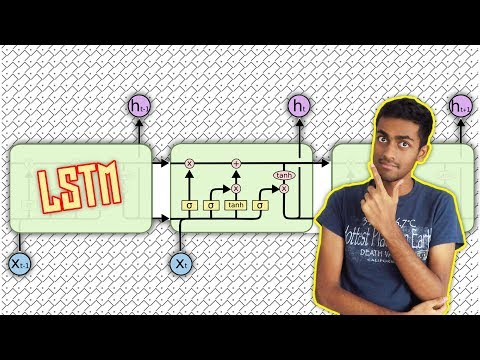

In [ ]:
YouTubeVideo('QciIcRxJvsM')

If you want to go a bit more advance about LSTM, [Understanding LSTM Networks
](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) is a really good blog by [colah](https://colah.github.io/)

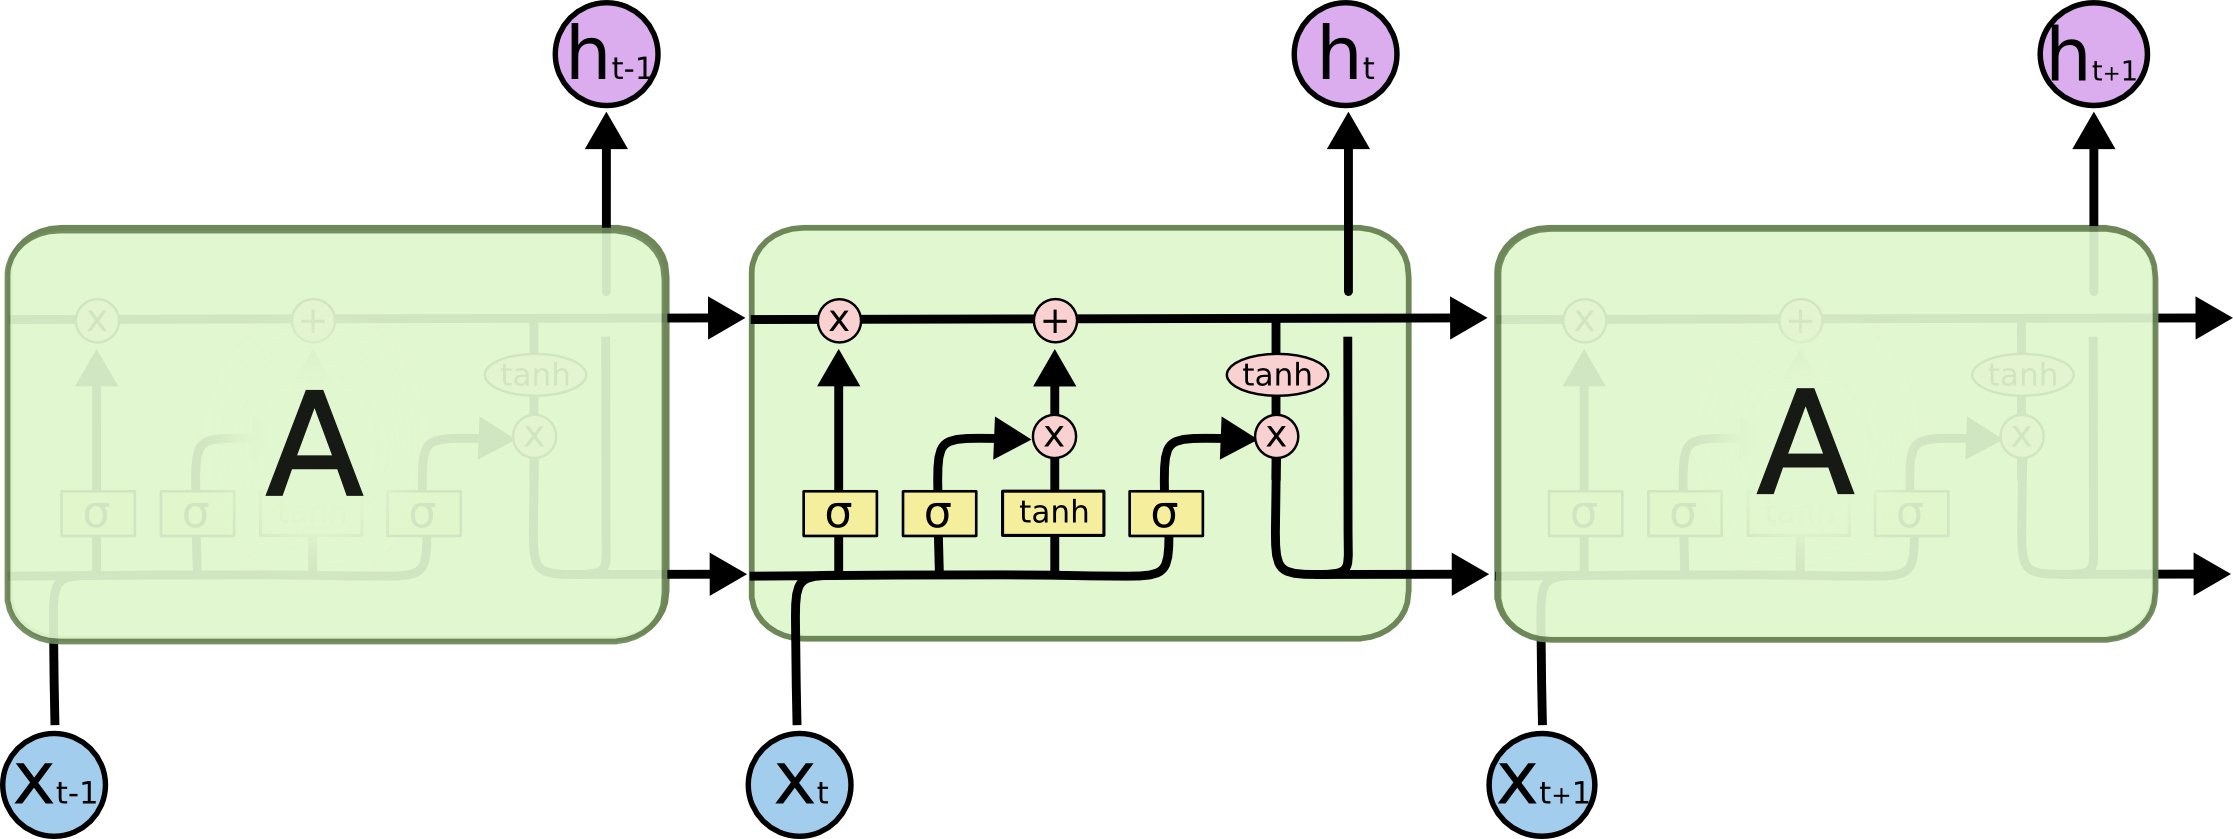

In [ ]:
# Creating a Sequential Model
model = tf.keras.Sequential([
    encoder,

    # Word embedding are very similar to word2vec that we used in the previous challanges, but in this, this will train as the model trains 
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),

    # Creating the LSTM layers, the return_sequences is set to True when there is also LSTM layer after it.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, )),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    # Output layer with 4 neurons. ( 4 classes )
    tf.keras.layers.Dense(4)
])

In [ ]:
# Configuring the models and settup up parameters, including optimizer, loss and metrics. 
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# predict on a sample text
sample_text = train_df.text[0]
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.00113596 -0.00072253  0.00577792  0.00659498]


There are the probabilies for each class

### Training the Model 🚆

In [ ]:
# Let's goo!
history = model.fit(train_dataset, epochs=10)

Epoch 1/10
493/493 [==============================] - 27s 31ms/step - loss: 0.3927 - accuracy: 0.6994
Epoch 2/10
493/493 [==============================] - 16s 32ms/step - loss: 0.3089 - accuracy: 0.7814
Epoch 3/10
493/493 [==============================] - 16s 32ms/step - loss: 0.3501 - accuracy: 0.7545
Epoch 4/10
493/493 [==============================] - 16s 32ms/step - loss: 0.3033 - accuracy: 0.8117
Epoch 5/10
493/493 [==============================] - 16s 32ms/step - loss: 0.2207 - accuracy: 0.8658
Epoch 6/10
493/493 [==============================] - 15s 31ms/step - loss: 0.2464 - accuracy: 0.8154
Epoch 7/10
493/493 [==============================] - 15s 31ms/step - loss: 0.2649 - accuracy: 0.8294
Epoch 8/10
493/493 [==============================] - 15s 31ms/step - loss: 0.2802 - accuracy: 0.8463
Epoch 9/10
493/493 [==============================] - 15s 31ms/step - loss: 0.2299 - accuracy: 0.8530
Epoch 10/10
493/493 [==============================] - 15s 31ms/step - loss: 0.208

## Validation

Now, we have done the training, let's test our model on unseen ( validation dataset ) to see how well our model performs!

In [ ]:
validation_predictions = model.predict(validation_dataset, verbose=1)
validation_predictions[0]

43/43 [==============================] - 4s 10ms/step


array([0.13306706, 0.35485056, 0.136038  , 0.4757739 ], dtype=float32)

In [ ]:
# Converting the predictions from probabilites into binary
y_pred_encoded = np.argmax(validation_predictions, axis=1)

# Getting the labels from binary using  train_one_hot_label
y_pred = [train_one_hot_label.columns[i]  for i in y_pred_encoded]

In [ ]:
print("F1 Score : ", f1_score(val_df['label'], y_pred, average="weighted"))

F1 Score :  0.8246149113453235


# Prediction phase 🔎

Again! Let's make our predictions just like in previous challange!


In [ ]:
# Loading the test dataset, model & train_one_hot_label

test_df = pd.read_csv("data/test.csv")

In [ ]:
# Making the predictions and convert them into actual labels
X_test = test_df['text'].values.astype(str)

model_results = model.predict(X_test)

encoded_results = np.argmax(model_results, axis=1)
results = [train_one_hot_label.columns[i]  for i in encoded_results]

In [ ]:
# Putting the results into the column of test dataset
test_df['label'] = results
test_df

id 
 text 
 label 
 
 
 
 
 0 
 0 
 we propose a lightweight framework to detect i... 
 3 
 
 
 1 
 1 
 the proposed method presents an alternate solu... 
 2 
 
 
 2 
 2 
 proposed ear identification method fusing SIFT... 
 3 
 
 
 3 
 3 
 a method to reconstruct the three-dimensional ... 
 3 
 
 
 4 
 4 
 strong local consistencies can improve their p... 
 0 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 10795 
 10795 
 whole-body gradient echo scans of 240 subjects... 
 3 
 
 
 10796 
 10796 
 we present a tracker that accomplishes trackin... 
 3 
 
 
 10797 
 10797 
 the most popular FL algorithm is Federated Ave... 
 1 
 
 
 10798 
 10798 
 in the field of Autonomous Driving, the system... 
 2 
 
 
 10799 
 10799 
 our method takes as an input a foreground imag... 
 3 
 
 
 
 10800 rows × 3 columns

**Note : Please make sure that there should be filename `submission.csv` in `assets` folder before submitting it**

In [ ]:
# Saving out results in submission.csv
test_df.to_csv(os.path.join("assets", 'submission.csv'), index=False)

# Submit to AIcrowd 🚀
**Note : Please save the notebook before submitting it (Ctrl + S)**

In [ ]:
!aicrowd notebook submit -c research-paper-classification -a assets --no-verify

Mounting Google Drive 💾
Your Google Drive will be mounted to access the colab notebook
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4g70Q147Eq7NhbJrvtK2OIUq166FvWgTI_F5Qn3eMHwxSoZ5XyHG0
Mounted at /content/drive
Using notebook: /content/drive/MyDrive/Colab Notebooks/Copy of Research Paper Classification for submission...
Scrubbing API keys fro

Congratulations 🎉 you did it, but there still a lot of improvement that can be made, here are some suggestions - 

1. Try out to solve the dataset imbalance issue
2. Try changing parameters, or adding more LSTM layers in the tensorflow model. 

And btw -

> Don't be shy to ask question related to any errors you are getting or doubts in any part of this notebook in [discussion forum](https://www.aicrowd.com/challenges/ai-blitz-9/problems/research-paper-classification/discussion) or in [AIcrowd Discord sever](https://discord.gg/T6uZSWBMSZ), AIcrew will be happy to help you :)

Also, wanna give us your valuable feedback for next blitz or wanna work with us creating blitz challanges ? Let us know! 